# HW0 - Turn your favorite photo a rotating video
**Total Points: 100**

**Assignment Due: Sep 11th Thursday 11:59 PM EST**

In this assignment, you will:
- Implement rotation using **forward mapping** (origin & arbitrary center)
- Implement rotation using **inverse mapping** (origin & arbitrary center)
- Animate your image rotating and export as an MP4 video

Please submit the following files on Canvas:
- The original .ipynb notebook
- A PDF version of the .ipynb notebook
- rotation.mp4
- rotating_favorite_video.mp4
- rotating_favorite_creative_video.mp4

Allowed libraries: **numpy, matplotlib (plt), imageio, opencv-python (cv2)**

In [ ]:
!pip install numpy matplotlib imageio opencv-python

Use `imageio.imread` to load the sample image.

/tmp/ipython-input-247308846.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('Lenna.png')


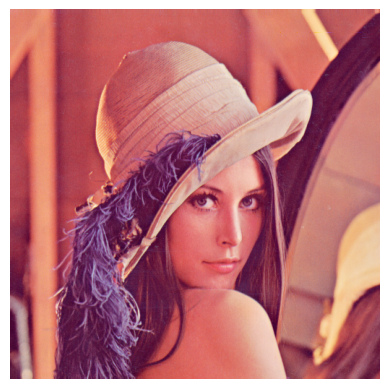

In [ ]:
import imageio
import matplotlib.pyplot as plt

img = imageio.imread('Lenna.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## Part A. Forward Mapping (30 points)
### Explanation
- **Equation:**
$$
x_d = R(\theta)\,x_s
$$

where

$$
R(\theta) =
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$

- **Insight:** *Where will the pixel land in the destination? (Throwing pixels forward).*

- **Pseudocode:**
```python
for each pixel (x_s, y_s) in source:
    [x_d, y_d] = R(theta) * [x_s, y_s]
    put source(x_s, y_s) into destination(round(x_d), round(y_d))
```

### Q1-1. Implement `forward_mapping_origin` (15 points)
Write a function that rotates around the origin using forward mapping.

In [ ]:
import numpy as np

def forward_mapping_origin(img, theta_deg):
    # TODO: Implement forward mapping around origin
    theta_rad = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

    # YOUR CODE HERE

    return out

### Q1-2. Rotate by 30 degrees and display (5 points)
The image should look like it is rotated by -30 degree because in a Numpy array, the y-axis increases downward, whereas in Cartesian coordinates, the y-axis increases upward.

The expected output looks as follows:

/tmp/ipython-input-188146722.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  expected_output = imageio.imread('HW0_Q1_2_expected_output.png')


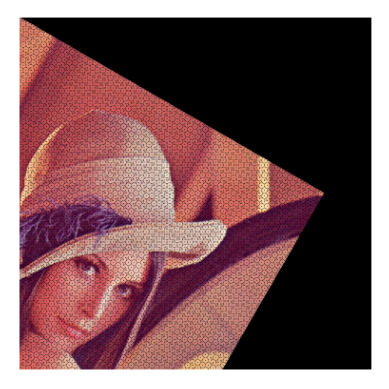

In [ ]:
expected_output = imageio.imread('HW0_Q1_2_expected_output.png')
plt.imshow(expected_output)
plt.axis('off')
plt.show()

In [ ]:
rotated = forward_mapping_origin(img, 30)
plt.imshow(rotated)
plt.axis('off')
plt.show()

### Q1-3. Implement rotation around arbitrary coordinate (15 points)
Hint: shift coordinates so that the chosen point is treated as the origin before rotation.

In [ ]:
def forward_mapping_arbitrary(img, theta_deg, cx, cy):
    # TODO: Implement forward mapping around arbitrary point (cx, cy)
    theta_rad = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

    # YOUR CODE HERE

    return out

### Q1-4. Rotate with center (x=256, y=256), θ=30° and display (5 points)

The expected output looks as follows:

/tmp/ipython-input-107794347.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  expected_output = imageio.imread('HW0_Q1_4_expected_output.png')


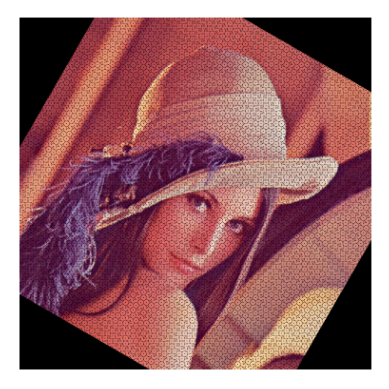

In [ ]:
expected_output = imageio.imread('HW0_Q1_4_expected_output.png')
plt.imshow(expected_output)
plt.axis('off')
plt.show()

In [ ]:
rotated = forward_mapping_arbitrary(img, 30, 256, 256)
plt.imshow(rotated)
plt.axis('off')
plt.show()

**Problems with forward mapping**: holes (gap in the image) - they appear because some destination pixels are not assigned a value when multiple source pixels map to the same location or when no source pixel maps to a destination pixel. That is why we use **inverse mapping**.

## Part B. Inverse Mapping (30 points)
### Explanation
- **Equation:**
$$
x_s = R(-\theta)\,x_d
$$

where

$$
R(-\theta) =
\begin{bmatrix}
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta
\end{bmatrix}
$$

- **Insight:** *Walk over each destination pixel and ask: where should I pull the color from in the source?*

- **Pseudocode:**
```python
for each pixel (x_d, y_d) in destination:
    [x_s, y_s] = R(-theta) * [x_d, y_d]
    destination(x_d, y_d) = sample_from_source(x_s, y_s)
```

### Q2-1. Implement `inverse_mapping_origin` (15 points)

In [ ]:
def inverse_mapping_origin(img, theta_deg):
    # TODO: Implement inverse mapping rotation around origin
    theta_rad = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

    # YOUR CODE HERE

    return out

### Q2-2. Display rotation (θ=30°) (5 points)

The expected output looks as follows:

/tmp/ipython-input-4232865078.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  expected_output = imageio.imread('HW0_Q2_2_expected_output.png')


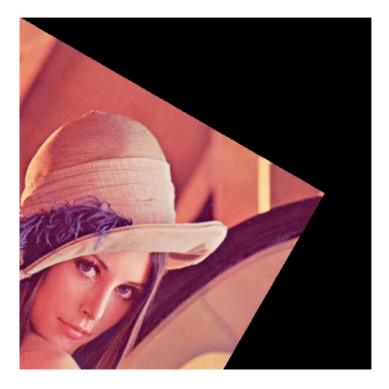

In [ ]:
expected_output = imageio.imread('HW0_Q2_2_expected_output.png')
plt.imshow(expected_output)
plt.axis('off')
plt.show()

In [ ]:
# Plot the output here.
rotated = inverse_mapping_origin(img, 30)
plt.imshow(rotated)
plt.axis('off')
plt.show()

### Q2-3. Implement rotation around arbitrary center (15 points)

In [ ]:
def inverse_mapping_arbitrary(img, theta_deg, cx, cy):
    # TODO: Implement inverse mapping around arbitrary point (cx, cy)
    theta_rad = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

    # YOUR CODE HERE

    return out

### Q2-4. Display result (x=256, y=256, θ=30°) (5 points)

The expected output looks as follows:

/tmp/ipython-input-431391595.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  expected_output = imageio.imread('HW0_Q2_4_expected_output.png')


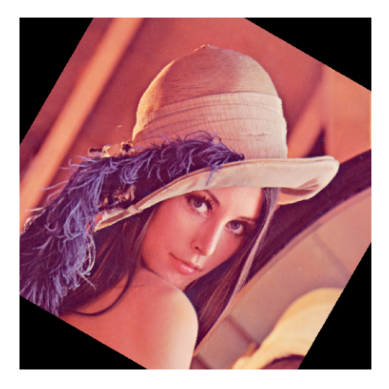

In [ ]:
expected_output = imageio.imread('HW0_Q2_4_expected_output.png')
plt.imshow(expected_output)
plt.axis('off')
plt.show()

In [ ]:
# Plot the output here
rotated = inverse_mapping_arbitrary(img, 30, 256, 256)
plt.imshow(rotated)
plt.axis('off')
plt.show()

## Part C. Animation (40 points)
### Q3-1. Rotation animation (15 points)
Implement a function to rotate the image continuously around the center and save as an MP4.

In [ ]:
import cv2

def make_rotation_video(img, seconds=3, fps=24, out_file='rotation.mp4'):
    h, w = img.shape[:2]
    center = (w//2, h//2)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(out_file, fourcc, fps, (w, h))

    # YOUR CODE HERE
    N = ...

    for t in range(N):

        theta = ...

        frame = inverse_mapping_arbitrary(img, theta, *center)
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        writer.write(frame_bgr)
    writer.release()


make_rotation_video(img, seconds=3, fps=24)

### Q3-2. Turn Your Favorite Photo a Rotatinv Video  (10 points)


In [ ]:
make_rotation_video(img, seconds=3, fps=24, out_file='rotating_favorite_photo.mp4')

### Q3-3. Creative Animation (15 points)
Create your own fun animation ('rotating_favorite_photo_creative.mp4'). For example:
- Image flying out of frame
- Zoom in/out while rotating
- Add trails or effects
Be creative!